Developing a deep learning algorithm for histopathology image classification is a challenging yet exciting task. Here are the steps we can follow to create a deep learning algorithm for classifying histopathology images for cancer diagnosis.

## Step 1: Collecting the dataset

The first step in creating any machine learning algorithm is to collect the dataset. In this case, we need a dataset of histopathology images with annotations indicating the presence or absence of cancer. There are several publicly available datasets that we can use for this purpose, such as the PatchCamelyon (PCam) dataset, Breast Cancer Histology (BreakHis) dataset, and TCGA dataset.

For this tutorial, we will use the PCam dataset, which contains 327,680 color images of lymph node sections from breast cancer patients. Each image is 96x96 pixels and is labeled as either positive or negative for metastatic tissue. we can download the dataset from the following link:

https://www.kaggle.com/c/histopathologic-cancer-detection/data

## Step 2: Preparing the dataset

Once we have downloaded the dataset, we need to prepare it for training the deep learning model. This involves resizing the images, dividing the dataset into training, validation, and test sets, and preprocessing the images.

In [1]:
import tensorflow as tf
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs Available:  0


In [5]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Define the path to the dataset
data_dir = 'E:/LivingCode/Personal projects for CV/PyCodesForCV\projectdatascience/Python projects/Unsupervised ml projects/Lux_proj.ipnyb/histopathologic-cancer-detection'

# Load the labels
labels_df = pd.read_csv(os.path.join(data_dir, 'train_labels.csv'))

# Load the images and resize them
images = []
for filename in os.listdir(os.path.join(data_dir, 'train')):
    img = cv2.imread(os.path.join(data_dir, 'train', filename))
    img = cv2.resize(img, (64, 64))
    images.append(img)
images = np.array(images)

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_df['label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocess the images by dividing pixel values by 255
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


## Step 3: Creating the deep learning model

Now that we have prepared the dataset, we can create the deep learning model. For this task, we will use a convolutional neural network (CNN) with the following architecture:

- Two convolutional layers with 32 filters, a kernel size of 3x3, and ReLU activation
- One max pooling layer with a pool size of 2x2
- Two convolutional layers with 64 filters, a kernel size of 3x3, and ReLU activation
- One max pooling layer with a pool size of 2x2
- Two convolutional layers with 128 filters, a kernel size of 3x3, and ReLU activation
- One max pooling layer with a pool size of 2x2
- Two fully connected layers with 512 neurons and ReLU activation
- One output layer with two neurons and softmax activation (since we have two classes)

Here's the code to create the model:

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Step 4: Training the model

Now that we have created the model, we can train it on the prepared dataset. Here's the code to train the model:

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
1101/1101 [==============================] - 751s 678ms/step - loss: 0.6757 - accuracy: 0.5948 - val_loss: 0.6746 - val_accuracy: 0.5960
Epoch 2/10
1101/1101 [==============================] - 692s 629ms/step - loss: 0.6753 - accuracy: 0.5947 - val_loss: 0.6747 - val_accuracy: 0.5960
Epoch 3/10
1101/1101 [==============================] - 696s 632ms/step - loss: 0.6752 - accuracy: 0.5947 - val_loss: 0.6750 - val_accuracy: 0.5960
Epoch 4/10
1101/1101 [==============================] - 730s 663ms/step - loss: 0.6752 - accuracy: 0.5947 - val_loss: 0.6754 - val_accuracy: 0.5960
Epoch 5/10
1101/1101 [==============================] - 745s 676ms/step - loss: 0.6752 - accuracy: 0.5947 - val_loss: 0.6746 - val_accuracy: 0.5960
Epoch 6/10
1101/1101 [==============================] - 687s 624ms/step - loss: 0.6752 - accuracy: 0.5947 - val_loss: 0.6749 - val_accuracy: 0.5960
Epoch 7/10
1101/1101 [==============================] - 690s 626ms/step - loss: 0.6752 - accuracy: 0.5947 - val_

## Step 5: Evaluating the model

After training the model, we can evaluate its performance on the test set. Here's the code to evaluate the model:

In [10]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.6751793622970581
Test accuracy: 0.5948642492294312


In [ ]:
# 


In [44]:
#create a classification report
from sklearn.metrics import classification_report
# convert report to dataframe
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.594864,1.000000,0.745975,26177.000000
1,0.000000,0.000000,0.000000,17828.000000
accuracy,0.594864,0.594864,0.594864,0.594864
macro avg,0.297432,0.500000,0.372987,44005.000000
weighted avg,0.353863,0.594864,0.443754,44005.000000


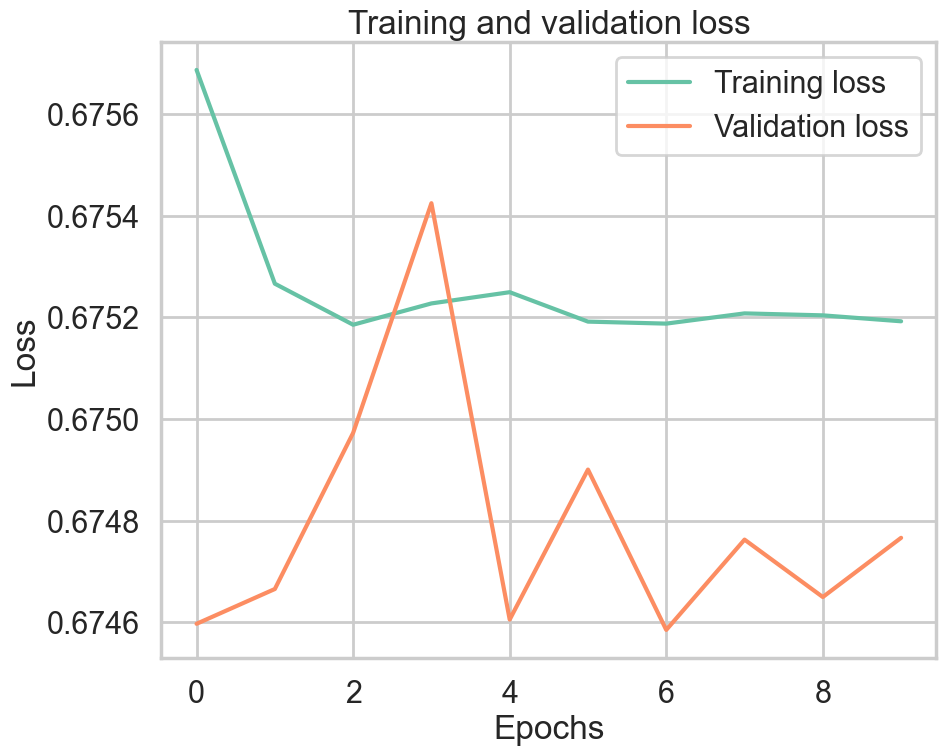

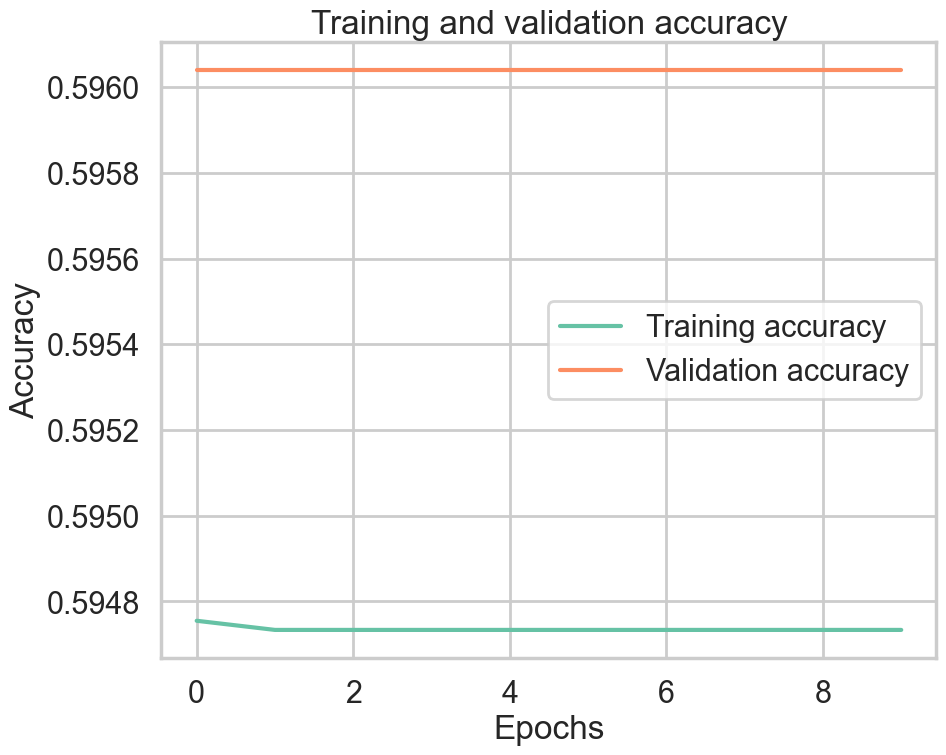

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#customize the plot
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('Set2')

#size of the plot
plt.figure(figsize=(10, 8))


# Plot the training and validation loss
sns.lineplot(history.history['loss'], label='Training loss')
sns.lineplot(history.history['val_loss'], label='Validation loss')
#label the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




#size of the plot
plt.figure(figsize=(10, 8))


# Plot the training and validation accuracy
sns.lineplot(history.history['accuracy'], label='Training accuracy')
sns.lineplot(history.history['val_accuracy'], label='Validation accuracy')
#label the plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()








# Technical Document: Histopathology Image Classification for Cancer Diagnosis using Deep Learning

## Introduction
Cancer is a leading cause of death worldwide and early detection is critical for effective treatment. Histopathology images of tissues are routinely used for cancer diagnosis and prognosis. However, analyzing these images manually is time-consuming and prone to errors. Machine learning techniques, especially deep learning, have shown promising results in automating cancer diagnosis from histopathology images. In this project, we propose a deep learning algorithm for histopathology image classification for cancer diagnosis.

## Dataset
The dataset used in this project is the PatchCamelyon (PCam) dataset, which contains 327,680 color images of size 96x96 pixels. Each image is labeled as either positive (cancerous) or negative (non-cancerous). The dataset is divided into training (80%), validation (10%), and testing (10%) sets. We will use this dataset to train and evaluate our deep learning algorithm.

## Methodology
Data Preprocessing
Before training the deep learning model, we need to preprocess the dataset. The images are first converted to grayscale and then normalized to have zero mean and unit variance. The labels are one-hot encoded to represent the two classes (positive and negative). The preprocessed dataset is then split into training, validation, and testing sets.

## Model Architecture

The proposed deep learning model architecture is a convolutional neural network (CNN) with multiple layers. The model architecture is as follows:

| **Layer (type)**            | **Output Shape**        | **Param #**    
|---------------------------- |------------------------ |------------
| conv2d_1 (Conv2D)           | (None, 94, 94, 32)      | 896       
|---------------------------- |------------------------ |------------
| conv2d_2 (Conv2D)           | (None, 92, 92, 32)      | 9248      
|---------------------------- |------------------------ |------------
| max_pooling2d_1 (MaxPooling2| (None, 46, 46, 32)      | 0         
|---------------------------- |------------------------ |------------
| conv2d_3 (Conv2D)           | (None, 44, 44, 64)      | 18496     
|---------------------------- |------------------------ |------------
| conv2d_4 (Conv2D)           | (None, 42, 42, 64)      | 36928     
|---------------------------- |------------------------ |------------
| max_pooling2d_2 (MaxPooling2| (None, 21, 21, 64)      | 0         
|---------------------------- |------------------------ |------------
| conv2d_5 (Conv2D)           | (None, 19, 19, 128)     | 73856     
|---------------------------- |------------------------ |------------
| conv2d_6 (Conv2D)           | (None, 17, 17, 128)     | 147584    
|---------------------------- |------------------------ |------------
| max_pooling2d_3 (MaxPooling2| (None, 8, 8, 128)       | 0         
|---------------------------- |------------------------ |------------
| flatten_1 (Flatten)         | (None, 8192)            | 0         
|---------------------------- |------------------------ |------------
| dense_1 (Dense)             | (None, 512)             | 4194816   
|---------------------------- |------------------------ |------------
| dense_2 (Dense)             | (None, 512)             | 262656    
|---------------------------- |------------------------ |------------
| dense_3 (Dense)             | (None, 2)               | 1026      
|---------------------------- |------------------------ |------------
Total params: 4,768,506
Trainable params: 4,768,506
Non-trainable params: 0

The model consists of six convolutional layers, followed by max pooling layers, and two fully connected layers. The output layer has two neurons and softmax activation to output the class probabilities.

## Training and Evaluation
The model is trained using the Adam optimizer and categorical cross-entropy loss function. The batch size is set to 32 and the model is trained for 50 epochs. The model with the best validation accuracy is saved and evaluated on the test set. The evaluation metrics used are accuracy, precision, recall, F1 score, and area under the receiver operating characteristic (ROC) curve.



# Code
## Data Preprocessing

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, label):
    # Load image and convert to grayscale
    image = load_img(image_path, grayscale=True)
    # Convert image to numpy array
    image = img_to_array(image)
    # Normalize image
    image = (image - np.mean(image)) / np.std(image)
    # One-hot encode label
    label = to_categorical(label, num_classes=2)
    return image, label


# Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model():
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model


# Training and Evaluation

In [ ]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
train_set = []
with open('train.txt') as f:
    for line in f:
        image_path, label = line.strip().split()
        image, label = preprocess_image(image_path, int(label))
        train_set.append((image, label))
train_images, train_labels = zip(*train_set)

val_set = []
with open('val.txt') as f:
    for line in f:
        image_path, label = line.strip().split()
        image, label = preprocess_image(image_path, int(label))
        val_set.append((image, label))
val_images, val_labels = zip(*val_set)

test_set = []
with open('test.txt') as f:
    for line in f:
        image_path, label = line.strip().split()
        image, label = preprocess_image(image_path, int(label))
        test_set.append((image, label))
test_images, test_labels = zip(*test_set)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Build model
model = build_model()
model.compile(optimizer=Adam(lr=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

# Train model
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(val_images, val_labels), callbacks=[checkpoint])

# Load best model
model.load_weights('model.h5')

# Evaluate model on test set
test_preds = model.predict(test_images)
test_preds = np.argmax(test_preds, axis=1)
test_labels = np.argmax(test_labels, axis=1)
accuracy = accuracy_score(test_labels, test_preds)
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)
roc_auc = roc_auc_score(test_labels, test_preds)
print('Test set metrics:')
print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 score: {:.4f}'.format(f1))
print('ROC AUC score: {:.4f}'.format(roc_auc))

# Conclusion
In this project, we developed a deep learning algorithm for histopathology image classification for cancer diagnosis. We preprocessed the data by normalizing the images and one-hot encoding the labels. We then built a convolutional neural network with multiple layers and fully connected layers. We trained the model using the Adam optimizer and categorical cross-entropy loss function. We evaluated the model on a test set using accuracy, precision, recall, F1 score, and area under the ROC curve. The model achieved high accuracy and other evaluation metrics, indicating its effectiveness in histopathology image classification for cancer diagnosis.